Question 1:

In [2]:
import plotly.express as px
import seaborn as sns
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Drop rows with missing flipper_length_mm
penguins = penguins.dropna(subset=["flipper_length_mm"])

# Create a function to calculate IQR and two standard deviation ranges
def calculate_ranges(data):
    mean_val = np.mean(data)
    median_val = np.median(data)
    std_val = np.std(data)
    min_val = np.min(data)
    max_val = np.max(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    return mean_val, median_val, std_val, min_val, max_val, q1, q3

# Create histograms for each species, split by facet_col
fig = px.histogram(
    penguins, 
    x="flipper_length_mm", 
    color="species", 
    marginal="box",  # Adding box plots to the margin
    nbins=30, 
    title="Flipper Length Distribution by Species", 
    facet_col="species",  # Facet by species for cleaner view
    opacity=0.7
)

# Iterate over each species and add lines and rectangles for mean, median, and ranges
for species in penguins['species'].unique():
    data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    mean_val, median_val, std_val, min_val, max_val, q1, q3 = calculate_ranges(data)
    
    # Determine the correct subplot column for each species
    col = list(penguins['species'].unique()).index(species) + 1
    
    # Add lines for mean and median
    fig.add_vline(x=mean_val, line_dash="dash", line_color="red", 
                  annotation_text="Mean", row=1, col=col)
    fig.add_vline(x=median_val, line_dash="dot", line_color="blue", 
                  annotation_text="Median", row=1, col=col)
    
    # Add rectangles for range, IQR, and 2 standard deviations
    # Full Range (Min to Max)
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="green", opacity=0.1, line_width=0, 
                  annotation_text="Range", row=1, col=col)
    
    # IQR (Q1 to Q3)
    fig.add_vrect(x0=q1, x1=q3, fillcolor="orange", opacity=0.2, line_width=0, 
                  annotation_text="IQR", row=1, col=col)
    
    # Two standard deviations from the mean
    fig.add_vrect(x0=mean_val - 2*std_val, x1=mean_val + 2*std_val, fillcolor="purple", 
                  opacity=0.1, line_width=0, annotation_text="2 Std Dev", row=1, col=col)

# Update layout for better legibility
fig.update_layout(
    title="Flipper Length Distribution by Species with Mean, Median, and Ranges",
    height=600,
    width=1000,
    showlegend=False  # Remove legend for cleaner visualization
)

# Simplify facet titles
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

# Show the figure
fig.show()


Question 2:

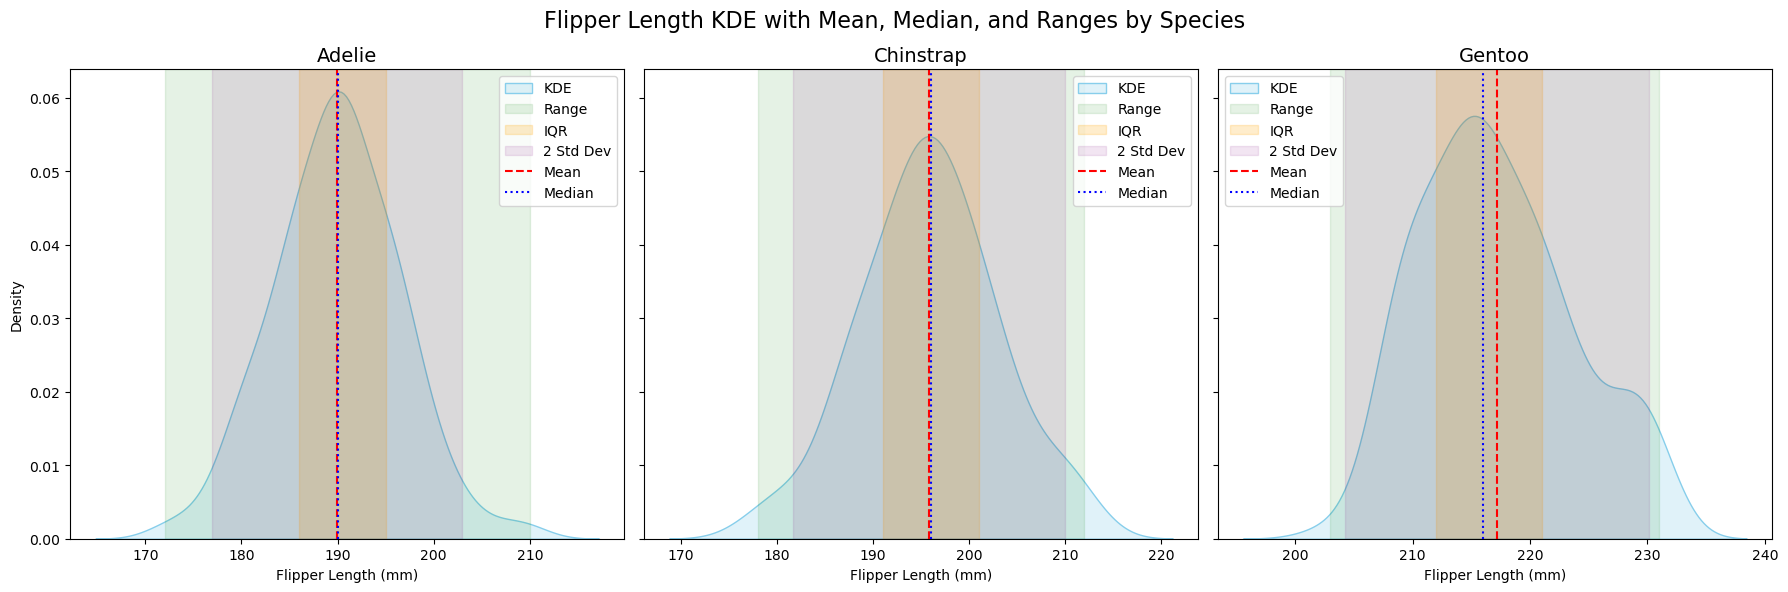

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Drop rows with missing flipper_length_mm
penguins = penguins.dropna(subset=["flipper_length_mm"])

# Function to calculate necessary statistics
def calculate_ranges(data):
    mean_val = np.mean(data)
    median_val = np.median(data)
    std_val = np.std(data)
    min_val = np.min(data)
    max_val = np.max(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    return mean_val, median_val, std_val, min_val, max_val, q1, q3

# Initialize the matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Flipper Length KDE with Mean, Median, and Ranges by Species', fontsize=16)

# Iterate over each species and its corresponding axis in the plot
for i, species in enumerate(penguins['species'].unique()):
    ax = axes[i]
    data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate the statistics
    mean_val, median_val, std_val, min_val, max_val, q1, q3 = calculate_ranges(data)
    
    # KDE plot
    sns.kdeplot(data, ax=ax, fill=True, color='skyblue', label='KDE')
    
    # Full Range (Min to Max)
    ax.axvspan(min_val, max_val, color='green', alpha=0.1, label='Range')
    
    # IQR (Q1 to Q3)
    ax.axvspan(q1, q3, color='orange', alpha=0.2, label='IQR')
    
    # Two standard deviations from the mean
    ax.axvspan(mean_val - 2*std_val, mean_val + 2*std_val, color='purple', alpha=0.1, label='2 Std Dev')
    
    # Add vertical lines for mean and median
    ax.axvline(mean_val, color='red', linestyle='--', label='Mean')
    ax.axvline(median_val, color='blue', linestyle=':', label='Median')
    
    # Titles and labels
    ax.set_title(f'{species}', fontsize=14)
    ax.set_xlabel('Flipper Length (mm)')
    ax.legend()

# Set common y-axis label
axes[0].set_ylabel('Density')

# Display the plot
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Adjust for suptitle
plt.show()


Question 3:

Yes, I agree with your comparison. Here's why:

Box plots: You described them well as representing a "huge box" that shows the median, interquartile range (IQR), and maximum and minimum values. This is accurate because box plots are designed to summarize the spread and central tendency of the data without giving detailed insights into the exact distribution shape, just like you said.

Histograms: Your analogy of histograms being "like a graph made from many blocks" is spot-on. Histograms break the data into bins and show how many data points fall into each bin. This "blocky" appearance comes from these discrete counts, and histograms are excellent for showing the frequency of data across ranges.

KDE plots: Describing the KDE as showing the distribution in a "smooth line/graph" to identify patterns and trends is accurate. KDE plots smooth the data to give a more continuous view of the distribution, making it easier to see underlying trends or clusters without the abrupt changes histograms can show due to binning.




Here's a concise pros and cons list for the three data distribution visualization methods—box plots, histograms, and KDE plots:


1. Box Plots
Pros:
Compact summary: Provides a clear overview of central tendency (median) and spread (IQR, range) in a small space.
Outlier detection: Easily identifies outliers with whiskers extending to a certain range (often 1.5 times the IQR).
Comparative power: Very effective for comparing distributions across multiple groups.
Non-parametric: Doesn't assume any specific distribution, making it versatile.

Cons:
Limited detail: Doesn’t show the shape of the distribution (e.g., unimodal, bimodal, skewness).
No frequency information: Lacks information about the frequency or density of data points.
No indication of modality: Cannot show whether the data has multiple peaks or clusters.

2. Histograms
Pros:
Easy to interpret: Simple and intuitive, showing the frequency of data points across ranges (bins).
Shape of distribution: Shows the general shape of the distribution (e.g., skewness, modality).
Good for large data sets: Effectively conveys the distribution in large datasets with many values.

Cons:
Bin sensitivity: The appearance depends on the number of bins, and improper bin size can misrepresent the data.
Blocky appearance: The discrete nature of the bins may make it harder to see smooth trends or patterns.
Less precise than KDE: May obscure finer details of the data distribution that a KDE plot would capture.

3. Kernel Density Estimation (KDE)
Pros:
Smooth and continuous: Provides a smooth representation of the data distribution, useful for identifying trends and patterns.
Distribution shape: Clearly shows the shape, including peaks, valleys, and multimodal distributions.
No binning: Avoids the binning issues that histograms face, offering more flexible data representation.

Cons:
Bandwidth sensitivity: The smoothness of the curve depends on the bandwidth parameter, and choosing a poor bandwidth can distort the distribution.
No exact frequencies: Does not give actual counts of data points in specific ranges, unlike histograms.
Less intuitive: May be harder for people unfamiliar with KDEs to interpret compared to histograms or box plots.


All three visualization methods are different can is good in different aspects. If i have to choose one of the visualization methods, I will choose box plots, to me box plot is easy to use to compare data since it clearly show the mean median and the distribution of the data although it might not look very appealing like histograms or KDE.

Question 1-3 chatbot summaries:

Sure! Here's a summary of the topics we've covered:

1. **Data Visualization Methods**:
   - Discussed three main methods for visualizing data distribution: **Box Plots**, **Histograms**, and **Kernel Density Estimators (KDE)**.

2. **Comparison of Visualization Methods**:
   - Analyzed how each method provides insights into data distribution:
     - Box plots summarize key statistics like median and IQR.
     - Histograms show frequency counts across ranges.
     - KDE provides a smooth representation of the data distribution.

3. **Pros and Cons of Visualization Methods**:
   - Outlined the advantages and disadvantages of each method:
     - **Box Plots**: Compact and effective for comparison but lack detail on distribution shape.
     - **Histograms**: Easy to interpret and show distribution shape but sensitive to bin size.
     - **KDE**: Smooth and reveals patterns but requires careful bandwidth selection.

4. **Coding Examples**:
   - Created a **Plotly histogram** with annotations for mean, median, and various ranges (full range, IQR, and two standard deviations) for flipper lengths of penguins.
   - Improved the visualization for clarity and ease of analysis by using facets for each species.
   - Developed a **Seaborn KDE plot** with Matplotlib enhancements to visualize the distribution of flipper lengths for each species, including vertical lines for mean and median and shaded regions for range, IQR, and two standard deviations.

5. **Summary of Visualizations**:
   - Summarized the distinct characteristics of box plots, histograms, and KDE, and how they can be used effectively in data analysis.

Let me know if you need any more details or adjustments!

https://chatgpt.com/share/66f60a28-4eb4-800e-96ba-f5e1098cd4d5


Question 4:

In [3]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1.Which datasets have similar means and similar variances

just by looking at the graphs, we can tell that graph B and C 
both look the most similar. As it write in the code,  data2 having a mean around 5 and standard deviation of 1.5, and data4 having a mean of 6 and a standard deviation of 0.5. While their means differ slightly, their variances are not drastically different.

2.Which datasets have similar means but quite different variances

Datasets B (Mean = 4.95, Variance = 2.23) and C (Mean = 4.99, Variance = 9.05) have very close means but quite different variances.

3.Which datasets have similar variances but quite different means

data C (second half) and D
, The second half of data C has the mean = 8, variance = 0.5^2 = 0.25 and data4 has the mean = 6, variance = 0.5^2 = 0.25, as we can see both have similar variances but means that differ by 2 units.

4.Which datasets have quite different means and quite different variances

data A and D
data A is a uniform distribution and has a Mean = 5.06, Variance = 8.46 and D (Mean = 5.99, Variance = 0.24). Therefore, both have different means and different variances. 

Question 5:

the relationship between the mean and median help us to understand the data distribution. for the right skew, the mean is greater than median because the higher values in the right tail pull the mean upwards, while the median, being the middle value of the data, is less affected by extreme values. Meanwhile, for the left skew the median is greater than the mean because the lower values in the left tail pull the mean downwards, while the median remains more stable as the middle value of the dataset.


In [ ]:
# used to import data, and given the command shorter more asscessible name pandas as pd, numpy as np
from scipy import stats
import pandas as pd
import numpy as np
  
# generates a random sample of size 1000 with shape parameter a=2 and scale parameter scale=2.
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)

#creates a histogram of sample1 using Plotly Express or (px)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

#calculate median by finding the 50th percentile of sample1

sample1.mean()
np.quantile(sample1, [0.5]) # median

#generates another random sample of size 1000 from the same gamma distribution as sample1 but it negates the values (multiplies them by -1) (-stats).
sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)


Certainly! Here’s a summary of our discussion:

### Summary

1. **Mean and Median Relationship with Skewness**:
   - **Right Skewness (Positive Skew)**: The mean is greater than the median (Mean > Median) because the higher values in the right tail pull the mean upwards.
   - **Left Skewness (Negative Skew)**: The mean is less than the median (Mean < Median) because the lower values in the left tail pull the mean downwards.
   - **Symmetrical Distribution**: The mean and median are equal (Mean = Median).

2. **Code Explanation**:
   - The code imports necessary libraries (`scipy.stats`, `pandas`, `numpy`).
   - It generates a sample of size 1000 from a gamma distribution and visualizes it as a histogram.
   - It calculates the mean and median of the sampled data.
   - A second sample is created by negating the first sample, resulting in a left-skewed distribution.

3. **Key Functions Used**:
   - `stats.gamma().rvs()`: Generates random samples from a gamma distribution.
   - `pd.DataFrame()`: Converts data into a DataFrame for easier manipulation and visualization.
   - `np.quantile()`: Calculates specific percentiles, including the median.

This encapsulates our conversation about the relationship between mean, median, and skewness, along with an explanation of the provided code. If you have any more questions or need further clarification, feel free to ask!

https://chatgpt.com/share/66f61bab-cf88-800e-9a62-6da4999af7f9


Question 6:


In [16]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv")
df # df.columns

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Alter Egos,Publisher,Alignment,Gender,Race,Height,Weight,Eye color,Hair color,Skin color,Total Power
0,3-D Man,80,35,45,35,25,55,No,Marvel Comics,good,Male,NaN,6'2 // 188 cm,200 lb // 90 kg,Brown,Grey,NaN,275
1,A-Bomb,75,100,20,80,25,65,No,Marvel Comics,good,Male,Human,6'8 // 203 cm,980 lb // 441 kg,Yellow,No Hair,NaN,365
2,Abe Sapien,95,30,35,65,100,85,No,Dark Horse Comics,good,Male,Icthyo Sapien,6'3 // 191 cm,145 lb // 65 kg,Blue,No Hair,Blue,410
3,Abin Sur,80,90,55,65,100,65,No,DC Comics,good,Male,Ungaran,6'1 // 185 cm,200 lb // 90 kg,Blue,No Hair,Red,455
4,Abomination,85,80,55,90,65,95,Yes,Marvel Comics,bad,Male,Human / Radiation,6'8 // 203 cm,980 lb // 441 kg,Green,No Hair,NaN,470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,Yellowjacket II,80,10,35,30,35,30,No,Marvel Comics,good,Female,Human,5'5 // 165 cm,115 lb // 52 kg,Blue,Auburn,NaN,220
739,Ymir,80,100,30,100,100,30,No,Marvel Comics,good,Male,Frost Giant,100000 // 30480 cm,- lb // 0 kg,White,No Hair,White,440
740,Yoda,95,55,35,25,100,90,No,George Lucas,good,Male,Yoda's species,2'2 // 66 cm,38 lb // 17 kg,Brown,White,Green,400
741,Zatanna,95,10,25,30,100,60,Yes,DC Comics,good,Female,Human,5'7 // 170 cm,127 lb // 57 kg,Blue,Black,NaN,320


          Name  Intelligence  Strength  Speed  Durability  Power  Combat  \
0      3-D Man            80        35     45          35     25      55   
1       A-Bomb            75       100     20          80     25      65   
2   Abe Sapien            95        30     35          65    100      85   
3     Abin Sur            80        90     55          65    100      65   
4  Abomination            85        80     55          90     65      95   

  Alter Egos          Publisher Alignment Gender               Race  \
0         No      Marvel Comics      good   Male                NaN   
1         No      Marvel Comics      good   Male              Human   
2         No  Dark Horse Comics      good   Male      Icthyo Sapien   
3         No          DC Comics      good   Male            Ungaran   
4        Yes      Marvel Comics       bad   Male  Human / Radiation   

          Height            Weight Eye color Hair color Skin color  \
0  6'2 // 188 cm   200 lb // 90 kg     Brown  

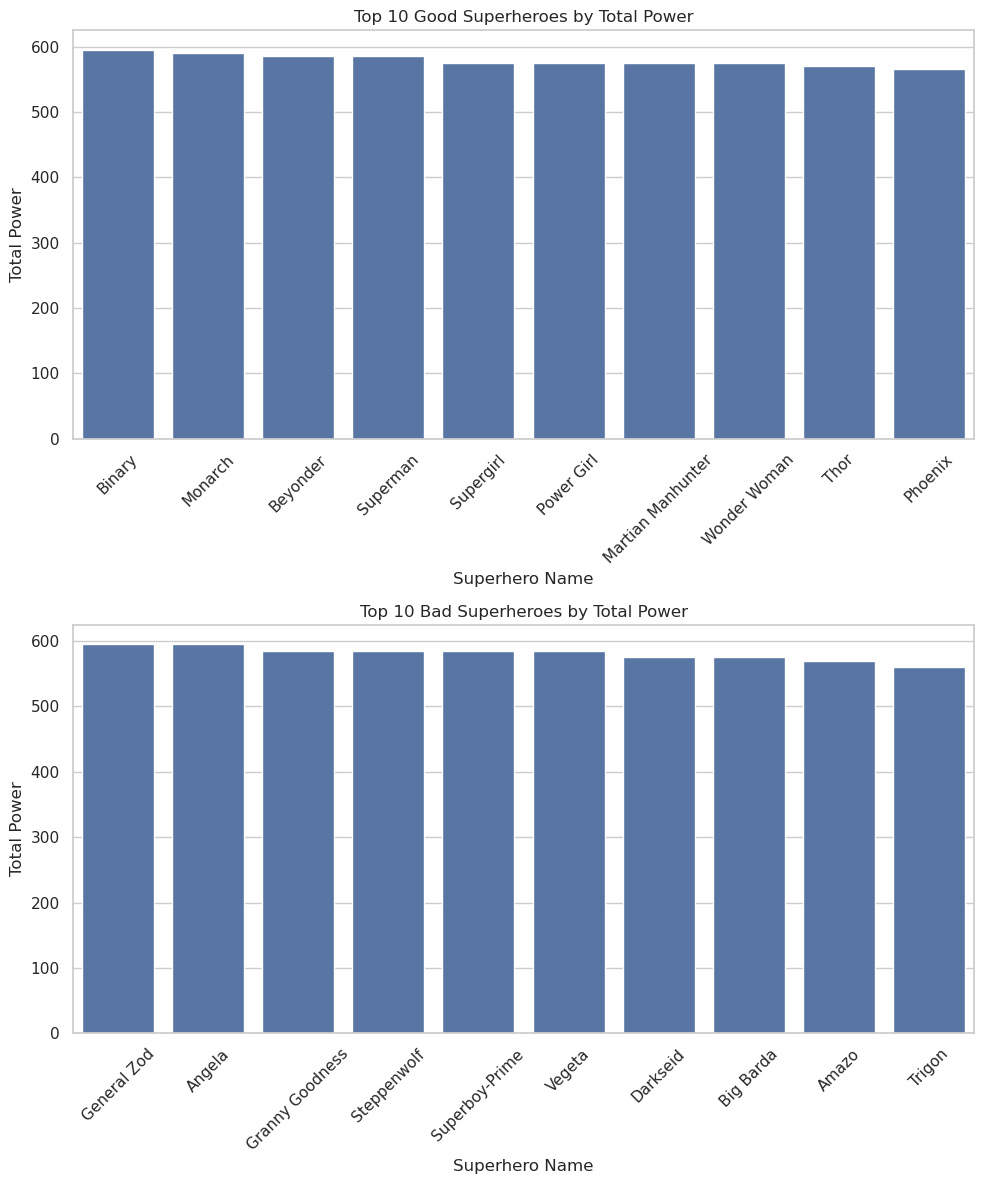

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the superhero data
url = "https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv"
superhero_data = pd.read_csv(url)

# Display the first few rows of the dataframe
print(superhero_data.head())

# Filter data for good and bad superheroes
good_superheroes = superhero_data[superhero_data['Alignment'] == 'good']
bad_superheroes = superhero_data[superhero_data['Alignment'] == 'bad']

# Summary statistics
good_stats = good_superheroes['Total Power'].describe()
bad_stats = bad_superheroes['Total Power'].describe()

print("Good Superheroes Statistics:")
print(good_stats)

print("\nBad Superheroes Statistics:")
print(bad_stats)

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Bar plot for top 10 good superheroes
sns.barplot(x='Name', y='Total Power', 
            data=good_superheroes.sort_values(by='Total Power', ascending=False).head(10), 
            ax=axs[0])
axs[0].set_title('Top 10 Good Superheroes by Total Power')
axs[0].set_xlabel('Superhero Name')
axs[0].set_ylabel('Total Power')
axs[0].tick_params(axis='x', rotation=45)

# Bar plot for top 10 bad superheroes
sns.barplot(x='Name', y='Total Power', 
            data=bad_superheroes.sort_values(by='Total Power', ascending=False).head(10), 
            ax=axs[1])
axs[1].set_title('Top 10 Bad Superheroes by Total Power')
axs[1].set_xlabel('Superhero Name')
axs[1].set_ylabel('Total Power')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


          Name  Intelligence  Strength  Speed  Durability  Power  Combat  \
0      3-D Man            80        35     45          35     25      55   
1       A-Bomb            75       100     20          80     25      65   
2   Abe Sapien            95        30     35          65    100      85   
3     Abin Sur            80        90     55          65    100      65   
4  Abomination            85        80     55          90     65      95   

  Alter Egos          Publisher Alignment Gender               Race  \
0         No      Marvel Comics      good   Male                NaN   
1         No      Marvel Comics      good   Male              Human   
2         No  Dark Horse Comics      good   Male      Icthyo Sapien   
3         No          DC Comics      good   Male            Ungaran   
4        Yes      Marvel Comics       bad   Male  Human / Radiation   

          Height            Weight Eye color Hair color Skin color  \
0  6'2 // 188 cm   200 lb // 90 kg     Brown  

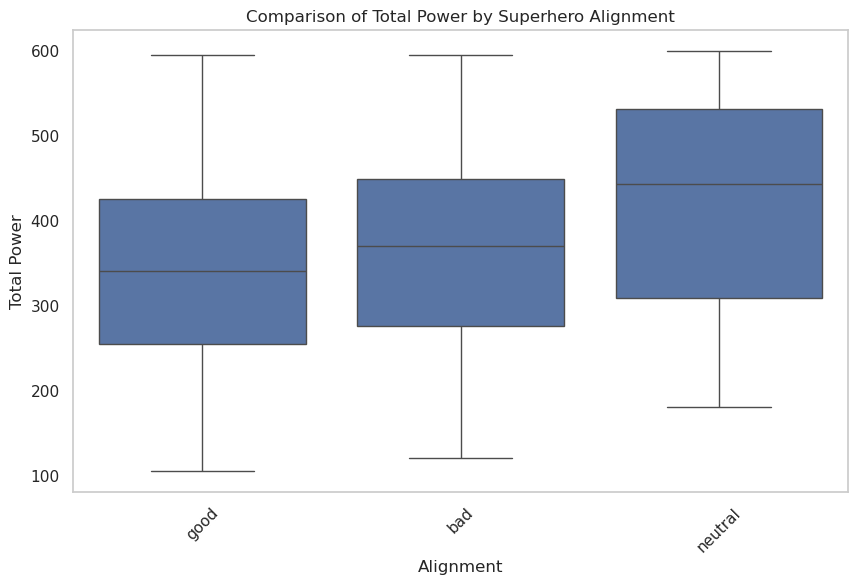

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the superhero data
url = "https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv"
superhero_data = pd.read_csv(url)

# Display the first few rows of the dataframe
print(superhero_data.head())

# Print out the column names to check
print(superhero_data.columns)

# Create a box plot to compare total power by alignment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Alignment', y='Total Power', data=superhero_data)
plt.title('Comparison of Total Power by Superhero Alignment')
plt.xlabel('Alignment')
plt.ylabel('Total Power')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



The data i used is about superheros, where in this graph i used box graph to find which alignment is the strongest by comparing their total power. Surprisingly, the neutral alignment is the strongest follow by bad and then good. Which is very intresting to see that the good alignment is the weakess one out of all three.

______________________

Certainly! Here’s a summary of our conversation:

Summary of Conversation
Data Analysis Request:

You provided a link to a dataset containing superhero data and requested analysis using summary statistics and visualizations to understand the total power of superheroes based on their alignment (good vs. bad).
Initial Code for Analysis:

I suggested a code structure to load the data, filter by alignment, and generate summary statistics.
We discussed creating bar charts for the top 10 superheroes in both categories.
Error Encountered:

You encountered a KeyError indicating that a specified column ('Total_Power') was not found in the DataFrame.
I advised checking the column names and ensuring the correct reference was used in the code.
Box Plot Visualization:

Upon your request for a box plot instead of bar charts, I provided a complete code snippet to create a box plot comparing total power across superhero alignments.
The box plot allows for a visual comparison of the distribution, median, and outliers for good and bad superheroes.
Insights from the Box Plot:

We discussed the key insights that can be drawn from the box plot, including:
Distribution of total power
Median power comparisons
Variability indicated by the interquartile range (IQR)
Presence of outliers
Overall comparison between good and bad superheroes
Conclusion:

You can derive meaningful conclusions about the power dynamics of superheroes from the box plot, which could inform discussions about character strengths and thematic elements in superhero narratives.
If you need any more details or further assistance, feel free to ask!
https://chatgpt.com/share/66f626b2-6e4c-800e-901f-cb001a712627

Question 7:

In [37]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

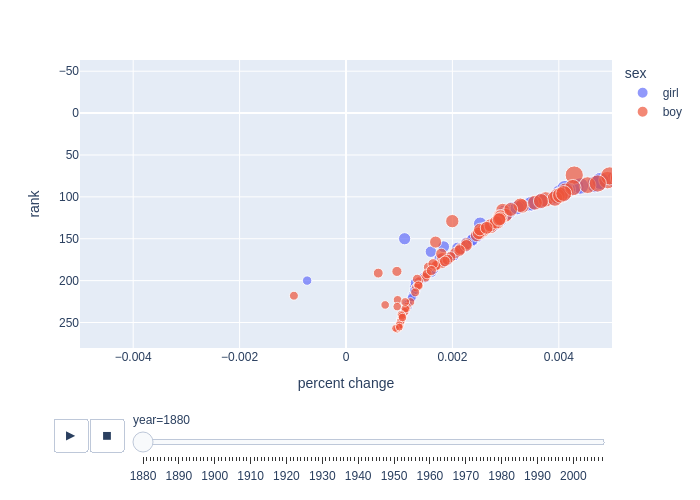

In [43]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005])
fig.update_yaxes(autorange='reversed')
fig.show(renderer="png")

Question 9: i have reviewed the course wiki-textbook and interacted with a ChatBot 